<a href="https://colab.research.google.com/github/smlra-kjsce/Cyber-ML-DL-101/blob/master/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-Layer Perceptron
<ul>
  <li><a href="http://neuralnetworksanddeeplearning.com/chap1.html">What is a neural network</a></li>
  <li><a href="https://www.unb.ca/cic/datasets/index.html">DataSets</a></li>
  <li>Example</li>
 </ul>

##Importing all libraries

In [0]:
# make sure to enable GPU acceleration! == Done
device = 'cuda'

!pip3 install torch torchvision
!pip install torchviz

#Import Libraries


from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from math import pi

     |████████████████████████████████| 51kB 5.9MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=d7192a081a0b9fa325e13f9f997cc1e6dc9cdf5c32f7dcab8b3e0a79365a3ef2
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


##Working with nested Linear Regression

Epoch:  0
Loss:  tensor(325.6006, dtype=torch.float64, grad_fn=<MeanBackward0>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


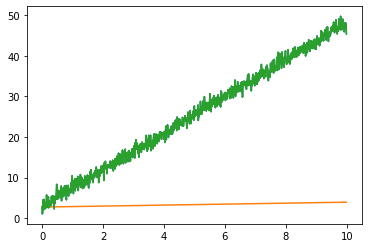

Epoch:  100
Loss:  tensor(2.7108, dtype=torch.float64, grad_fn=<MeanBackward0>)


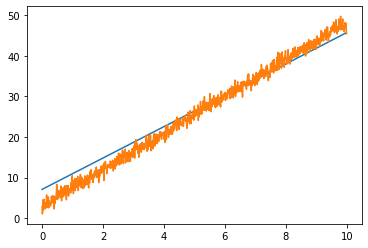

Epoch:  200
Loss:  tensor(1.7047, dtype=torch.float64, grad_fn=<MeanBackward0>)


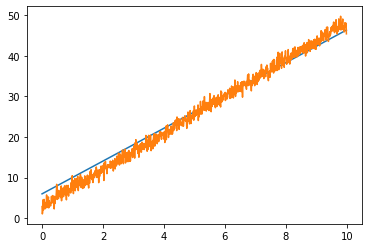

Epoch:  300
Loss:  tensor(1.2018, dtype=torch.float64, grad_fn=<MeanBackward0>)


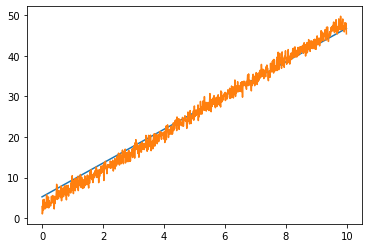

Epoch:  400
Loss:  tensor(0.9215, dtype=torch.float64, grad_fn=<MeanBackward0>)


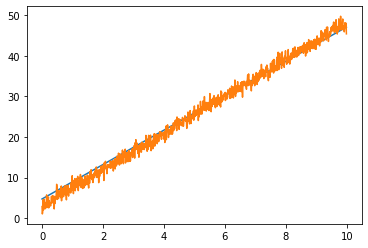

Epoch:  500
Loss:  tensor(0.7569, dtype=torch.float64, grad_fn=<MeanBackward0>)


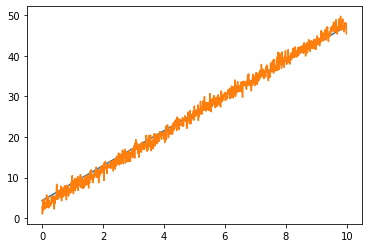

Epoch:  600
Loss:  tensor(0.6576, dtype=torch.float64, grad_fn=<MeanBackward0>)


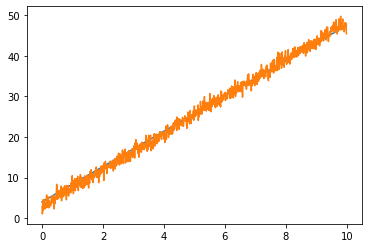

Epoch:  700
Loss:  tensor(0.5970, dtype=torch.float64, grad_fn=<MeanBackward0>)


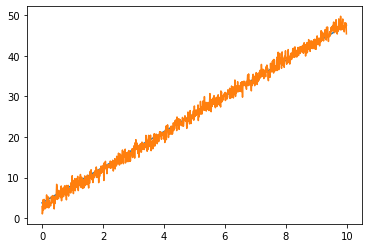

Epoch:  800
Loss:  tensor(0.5598, dtype=torch.float64, grad_fn=<MeanBackward0>)


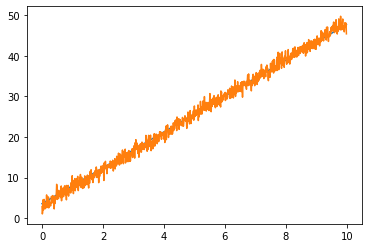

Epoch:  900
Loss:  tensor(0.5370, dtype=torch.float64, grad_fn=<MeanBackward0>)


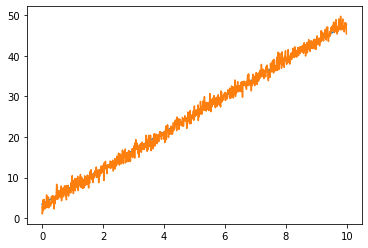

tensor(2.1988, dtype=torch.float64, requires_grad=True)
tensor(1.1610, dtype=torch.float64, requires_grad=True)
tensor(1.1663, dtype=torch.float64, requires_grad=True)
tensor(-0.3533, dtype=torch.float64, requires_grad=True)
tensor(1.2049, dtype=torch.float64, requires_grad=True)
tensor(-0.0746, dtype=torch.float64, requires_grad=True)
tensor(1.4409, dtype=torch.float64, requires_grad=True)
tensor(1.7056, dtype=torch.float64, requires_grad=True)


In [0]:
losses = []

# generating the data
x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + np.random.normal(size=1000)


plt.plot(x,y)
x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*8
params[0] = m = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(0.3,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(0.3,dtype=torch.double),requires_grad=True) # 0.9 for local minima
params[4] = c1 = Variable(torch.tensor(0.4,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(0.4,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)

lr = 1e-3

for epoch in range(1000):
  
  # Learning Rate Scheduling
  # lr = lr*0.999
  
  # Compute the function
  Y = params[0]*x + params[1]
  Y = params[2]*Y + params[3]
  Y = params[4]*Y + params[5]
  Y = params[6]*Y + params[7]

  # Compute the loss
  loss = ((Y-y)*(Y-y))/2
  loss = loss.mean()

  # Zero out the gradients
  for i in params:
    if i.grad!=None:
      i.grad.data=torch.tensor(0.0,dtype=torch.double)

  # Compute Gradients
  loss.backward()
  # for i in params:
    # print(i.grad)
  
  losses.append(loss.detach().numpy())
    
  # Update Parameters
  for i in range(len(params)):
    params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)
  
  if epoch%100==0:
    print('Epoch: ',epoch)
    print("Loss: ",loss)
    plt.plot(x.detach().numpy(),Y.detach().numpy())
    plt.plot(x.detach().numpy(),y.detach().numpy())
    plt.show()
    
for i in params:
  print(i)

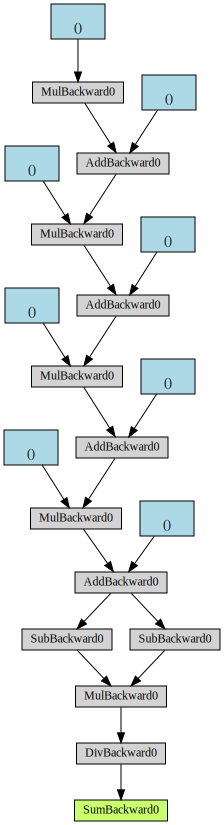

In [0]:
import torch
from torchviz import make_dot, make_dot_from_trace

x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + 2.8 * np.sin( 0.5 * pi * x + pi/3) - 5.2 * np.sin(0.25 * pi * x + pi/5) + np.random.normal(size=1000)

x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*8
params[0] = m = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(0.3,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(0.3,dtype=torch.double),requires_grad=True) # 0.9 for local minima
params[4] = c1 = Variable(torch.tensor(0.4,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(0.4,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)

# Compute the function
Y = params[0]*x + params[1]
Y = params[2]*Y + params[3]
Y = params[4]*Y + params[5]
Y = params[6]*Y + params[7]

# Compute the loss
loss = ((Y-y)*(Y-y))/2
loss = loss.sum() # Computing the error

make_dot(loss)

##Nested Linear Regression for curves

Epoch:  0
Loss:  tensor(6516.1847, dtype=torch.float64, grad_fn=<MeanBackward0>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


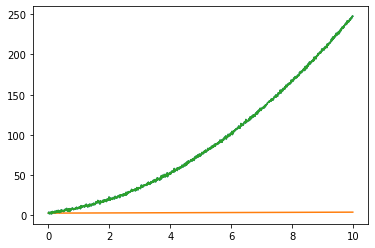

Epoch:  100
Loss:  tensor(351.5701, dtype=torch.float64, grad_fn=<MeanBackward0>)


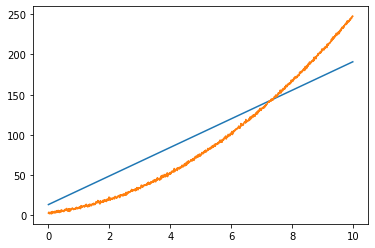

Epoch:  200
Loss:  tensor(283.0152, dtype=torch.float64, grad_fn=<MeanBackward0>)


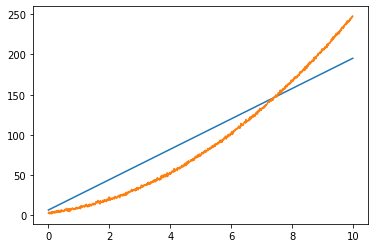

Epoch:  300
Loss:  tensor(234.9300, dtype=torch.float64, grad_fn=<MeanBackward0>)


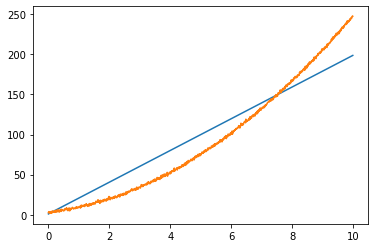

Epoch:  400
Loss:  tensor(195.5421, dtype=torch.float64, grad_fn=<MeanBackward0>)


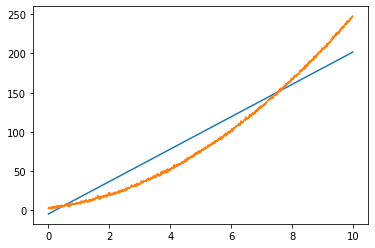

Epoch:  500
Loss:  tensor(162.2548, dtype=torch.float64, grad_fn=<MeanBackward0>)


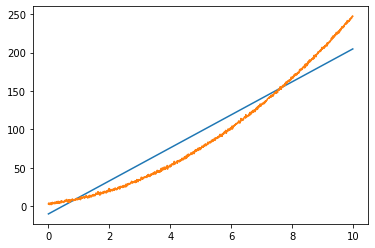

Epoch:  600
Loss:  tensor(136.5733, dtype=torch.float64, grad_fn=<MeanBackward0>)


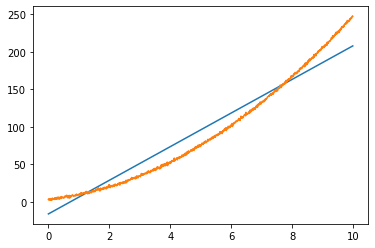

Epoch:  700
Loss:  tensor(120.9707, dtype=torch.float64, grad_fn=<MeanBackward0>)


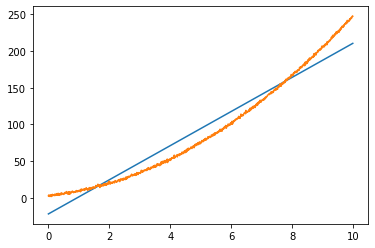

Epoch:  800
Loss:  tensor(114.4112, dtype=torch.float64, grad_fn=<MeanBackward0>)


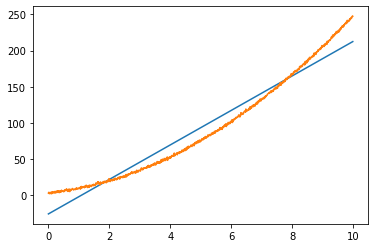

Epoch:  900
Loss:  tensor(112.5493, dtype=torch.float64, grad_fn=<MeanBackward0>)


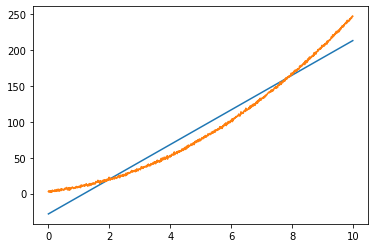

tensor(2.2136, dtype=torch.float64, requires_grad=True)
tensor(-1.7201, dtype=torch.float64, requires_grad=True)
tensor(1.7391, dtype=torch.float64, requires_grad=True)
tensor(-1.7075, dtype=torch.float64, requires_grad=True)
tensor(2.4298, dtype=torch.float64, requires_grad=True)
tensor(-0.5244, dtype=torch.float64, requires_grad=True)
tensor(2.6055, dtype=torch.float64, requires_grad=True)
tensor(1.6213, dtype=torch.float64, requires_grad=True)


In [0]:
losses = []

# generating the data
x = np.array([_/100 for _ in range(1000)])
y = 2*x*x + 4.5*x + 3 + np.random.normal(size=1000)


plt.plot(x,y)
x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*8
params[0] = m = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(0.3,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(0.3,dtype=torch.double),requires_grad=True) # 0.9 for local minima
params[4] = c1 = Variable(torch.tensor(0.4,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(0.4,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)

lr = 1e-4

for epoch in range(1000):
  
  # Learning Rate Scheduling
  # lr = lr*0.999
  
  # Compute the function
  Y = params[0]*x + params[1]
  Y = params[2]*Y + params[3]
  Y = params[4]*Y + params[5]
  Y = params[6]*Y + params[7]

  # Compute the loss
  loss = ((Y-y)*(Y-y))/2
  loss = loss.mean()

  # Zero out the gradients
  for i in params:
    if i.grad!=None:
      i.grad.data=torch.tensor(0.0,dtype=torch.double)

  # Compute Gradients
  loss.backward()
  # for i in params:
    # print(i.grad)
  
  losses.append(loss.detach().numpy())
    
  # Update Paramters
  for i in range(len(params)):
    params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)
  
  if epoch%100==0:
    print('Epoch: ',epoch)
    print("Loss: ",loss)
    plt.plot(x.detach().numpy(),Y.detach().numpy())
    plt.plot(x.detach().numpy(),y.detach().numpy())
    plt.show()
    
for i in params:
  print(i)

##Nested Linear Regression with activation function

Epoch:  0
Loss:  tensor(308.9693, dtype=torch.float64, grad_fn=<MeanBackward0>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


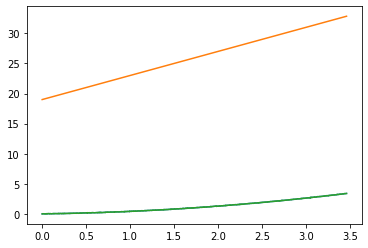

Epoch:  10000
Loss:  tensor(0.0056, dtype=torch.float64, grad_fn=<MeanBackward0>)


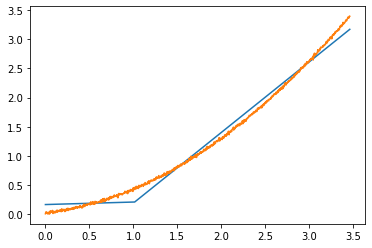

Epoch:  20000
Loss:  tensor(0.0053, dtype=torch.float64, grad_fn=<MeanBackward0>)


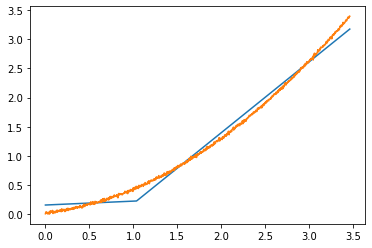

Epoch:  30000
Loss:  tensor(0.0051, dtype=torch.float64, grad_fn=<MeanBackward0>)


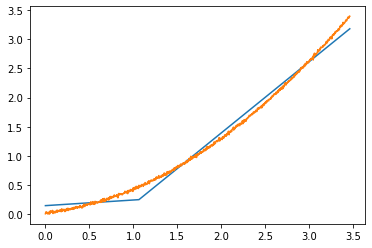

Epoch:  40000
Loss:  tensor(0.0047, dtype=torch.float64, grad_fn=<MeanBackward0>)


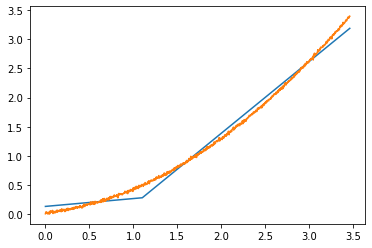

Epoch:  50000
Loss:  tensor(0.0042, dtype=torch.float64, grad_fn=<MeanBackward0>)


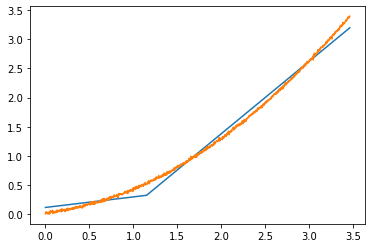

Epoch:  60000
Loss:  tensor(0.0037, dtype=torch.float64, grad_fn=<MeanBackward0>)


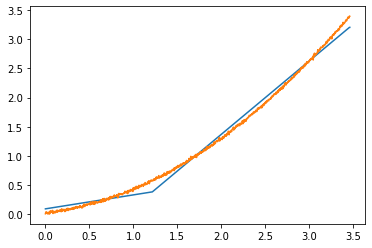

Epoch:  70000
Loss:  tensor(0.0030, dtype=torch.float64, grad_fn=<MeanBackward0>)


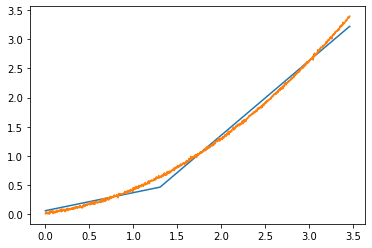

Epoch:  80000
Loss:  tensor(0.0023, dtype=torch.float64, grad_fn=<MeanBackward0>)


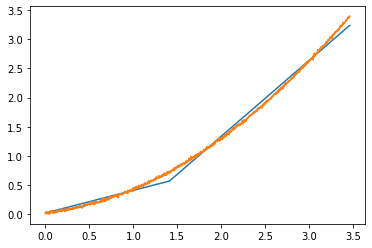

Epoch:  90000
Loss:  tensor(0.0018, dtype=torch.float64, grad_fn=<MeanBackward0>)


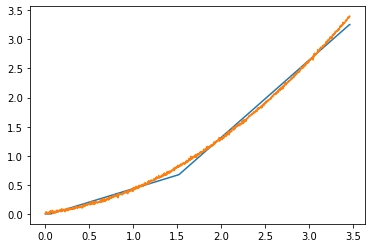

Epoch:  100000
Loss:  tensor(0.0014, dtype=torch.float64, grad_fn=<MeanBackward0>)


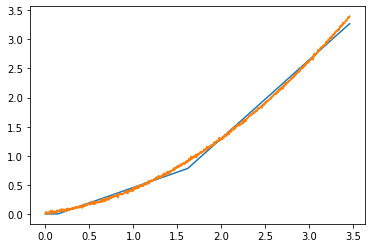

tensor(-0.5198, dtype=torch.float64, requires_grad=True)
tensor(1.7970, dtype=torch.float64, requires_grad=True)
tensor(1.1465, dtype=torch.float64, requires_grad=True)
tensor(0.0485, dtype=torch.float64, requires_grad=True)
tensor(-1.9743, dtype=torch.float64, requires_grad=True)
tensor(1.8878, dtype=torch.float64, requires_grad=True)
tensor(-0.8872, dtype=torch.float64, requires_grad=True)
tensor(0.8023, dtype=torch.float64, requires_grad=True)
tensor(1.7961, dtype=torch.float64, requires_grad=True)


In [0]:
losses = []

# generating the data
x = np.array([_/100 for _ in range(1000)])
y = 2*x*x + 4.5*x + 3 + np.random.normal(size=1000)
y = (y-np.min(y))/np.std(y)
x = (x-np.min(x))/np.std(x)

plt.plot(x,y)
x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*9
params[0] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[1] = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)
params[2] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[3] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[4] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[5] = Variable(torch.tensor(3,dtype=torch.double),requires_grad=True)
params[6] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[7] = Variable(torch.tensor(3,dtype=torch.double),requires_grad=True)
params[8] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)

lr = 1e-2

for epoch in range(100001):
  
  # Learning Rate Scheduling
  # lr = lr*0.999
  
  # Compute the function
  Y = params[0]*x + params[1]
  Y = torch.max(Y,torch.tensor([0.0],dtype = torch.double))
  Y1 = params[2]*Y + params[3]
  Y1 = torch.max(Y1,torch.tensor([0.0],dtype = torch.double))
  Y2 = params[4]*Y + params[5]
  Y2 = torch.max(Y2,torch.tensor([0.0],dtype = torch.double))
  Y3 = params[6]*Y1 + params[7]*Y2 + params[8]
  Y3 = torch.max(Y3,torch.tensor([0.0],dtype = torch.double))
  Y = Y3

  # Compute the loss
  loss = ((Y-y)*(Y-y))/2
  loss = loss.mean()

  # Zero out the gradients
  for i in params:
    if i.grad!=None:
      i.grad.data=torch.tensor(0.0,dtype=torch.double)

  # Compute Gradients
  loss.backward()
  # for i in params:
    # print(i.grad)
  
  losses.append(loss.detach().numpy())
    
  # Update Paramters
  for i in range(len(params)):
    params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)
  
  if epoch%10000==0:
    print('Epoch: ',epoch)
    print("Loss: ",loss)
    plt.plot(x.detach().numpy(),Y.detach().numpy())
    plt.plot(x.detach().numpy(),y.detach().numpy())
    plt.show()
    
for i in params:
  print(i)

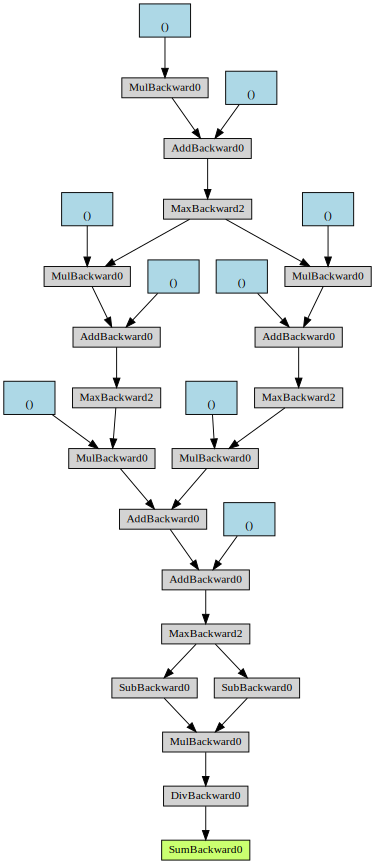

In [0]:
import torch
from torchviz import make_dot, make_dot_from_trace

x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + 2.8 * np.sin( 0.5 * pi * x + pi/3) - 5.2 * np.sin(0.25 * pi * x + pi/5) + np.random.normal(size=1000)

x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*9
params[0] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[1] = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)
params[2] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[3] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[4] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[5] = Variable(torch.tensor(3,dtype=torch.double),requires_grad=True)
params[6] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[7] = Variable(torch.tensor(3,dtype=torch.double),requires_grad=True)
params[8] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)

lr = 1e-2

# Compute the function
Y = params[0]*x + params[1]
Y = torch.max(Y,torch.tensor([0.0],dtype = torch.double))
Y1 = params[2]*Y + params[3]
Y1 = torch.max(Y1,torch.tensor([0.0],dtype = torch.double))
Y2 = params[4]*Y + params[5]
Y2 = torch.max(Y2,torch.tensor([0.0],dtype = torch.double))
Y3 = params[6]*Y1 + params[7]*Y2 + params[8]
Y3 = torch.max(Y3,torch.tensor([0.0],dtype = torch.double))
Y = Y3
  
# Compute the loss
loss = ((Y-y)*(Y-y))/2
loss = loss.sum() # Computing the error

make_dot(loss)

#Working with Network Data
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fproxy%2F0*At0wJRULTXvyA3EK.png&imgrefurl=https%3A%2F%2Fmedium.com%2F%40ashok.tankala%2Fbuild-the-mnist-model-with-your-own-handwritten-digits-using-tensorflow-keras-and-python-f8ec9f871fd3&docid=AyST2t5JJTBqhM&tbnid=iBYwoLeH0wrdOM%3A&vet=10ahUKEwjOu9ie1LfkAhUb8HMBHX8iDoUQMwhnKAYwBg..i&w=495&h=494&bih=625&biw=1366&q=mnist%20images&ved=0ahUKEwjOu9ie1LfkAhUb8HMBHX8iDoUQMwhnKAYwBg&iact=mrc&uact=8">What is MNIST?</a>

##Building the model

### Adding PyTorch to this notebook

In [0]:
# make sure to enable GPU acceleration! == Done
device = 'cuda'

In [0]:
!pip3 install torch torchvision

###Importing All Needed Files

In [0]:
#Import Libraries

from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from copy import deepcopy

###All Paramteres for training the model

In [0]:
args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=1000  #The number of Epochs is the number of times you go through the full dataset. 
args['lr']=0.1 #Learning rate is how fast it will decend. 
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).
args['seed']=1 #random seed
args['log_interval']=10
args['cuda']=False

###Downloading and pre-processing data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
xtrain = np.load('/content/drive/My Drive/Industry Session/DDos_xtrain.npy')
xtest = np.load('/content/drive/My Drive/Industry Session/DDos_xtest.npy')
ytrain = np.load('/content/drive/My Drive/Industry Session/DDos_ytrain.npy', allow_pickle=True)
ytest = np.load('/content/drive/My Drive/Industry Session/DDos_ytest.npy', allow_pickle=True)

In [0]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
xtrain = torch.Tensor(xtrain)
xtest = torch.Tensor(xtest)
enc.fit(ytrain.reshape(-1,1))
ytrain_fit = enc.transform(ytrain.reshape(-1,1))
ytest_fit = enc.transform(ytest.reshape(-1,1))
ytrain_fit = np.array([i[0] for i in ytrain_fit])
ytest_fit = np.array([i[0] for i in ytest_fit])
ytrain = torch.Tensor(ytrain_fit).long()
ytest = torch.Tensor(ytest_fit).long()
enc.categories_

[array(['BENIGN', 'UDP-lag', 'WebDDoS'], dtype=object)]

###Defining the model
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1632%2F1*EoxGktMmCkZXy37ydosBwQ.png&imgrefurl=https%3A%2F%2Fmedium.com%2F%40ZhengLungWu%2Fsoftmax-v-s-logsoftmax-7ce2323d32d3&docid=XhmlZfvPvHW9xM&tbnid=lgA7x9epgsz5oM%3A&vet=10ahUKEwjX3eSg1bfkAhXqILcAHepXCJIQMwhVKAwwDA..i&w=816&h=1030&bih=625&biw=1366&q=log%20softmax&ved=0ahUKEwjX3eSg1bfkAhXqILcAHepXCJIQMwhVKAwwDA&iact=mrc&uact=8">What is log-softmax</a>

In [0]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(52, 36)
        self.fc2 = nn.Linear(36, 16)
        self.fc3 = nn.Linear(16, 3)

    def forward(self, x):
        self.x = x
        #Fully Connected Layer/Activation
        self.after_fc1 = self.fc1(self.x) # Linear operations
        self.after_relu1 = F.relu(self.after_fc1) # Activation Function
        self.after_dropout1 = F.dropout(self.after_relu1, training=self.training) # dropping features randomly
        #Fully Connected Layer/Activation
        self.after_fc2 = self.fc2(self.after_dropout1)
        self.after_relu2 = F.relu(self.after_fc2)
        self.after_dropout2 = F.dropout(self.after_relu2, training=self.training)
        self.after_fc3 = self.fc3(self.after_dropout2)
        #Softmax gets probabilities. 
        return F.log_softmax(self.after_fc3, dim=1)


###Training and Testing the Model
<a href="https://discuss.pytorch.org/t/pytorch-formula-for-nll-loss/38121">What is NLL_Loss?</a>

In [0]:
losses = []
def train(epoch):
    global xtrain, ytrain
    model.train()
    if args['cuda']:
      xtrain, ytrain = xtrain.cuda(), ytrain.cuda()
    #Variables in Pytorch are differenciable. 
    xtrain, ytrain = Variable(xtrain), Variable(ytrain)
    #This will zero out the gradients for this batch. 
    optimizer.zero_grad()
    output = model(xtrain)
    # print(output)
    # Calculate the loss The negative log likelihood loss. It is useful to train a classification problem with C classes.
    loss = F.nll_loss(output, ytrain)
    # print(loss)
    #dloss/dx for every Variable 
    loss.backward()
    losses.append(loss.item())
    #to do a one-step update on our parameter.
    optimizer.step()
    #Print out the loss periodically. 
    print('Train Epoch:',epoch,'Loss:',loss)
def test():
    global xtest, ytest
    model.eval()
    test_loss = 0
    correct = 0
    if args['cuda']:
      xtest, ytest = xtest.cuda(), ytest.cuda()
    xtest, ytest = Variable(xtest, volatile=True), Variable(ytest)
    output = model(xtest)
    test_loss += F.nll_loss(output, ytest, size_average=False).data # sum up batch loss
    pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
    correct += pred.eq(ytest.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(ytest)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(ytest),
        100. * correct / len(ytest)))
            
model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()

Train Epoch: 1 Loss: tensor(1.1328, grad_fn=<NllLossBackward>)

Test set: Average loss: 1.0973, Accuracy: 109/240 (45%)

Train Epoch: 2 Loss: tensor(1.1361, grad_fn=<NllLossBackward>)

Test set: Average loss: 1.0874, Accuracy: 136/240 (57%)

Train Epoch: 3 Loss: tensor(1.1202, grad_fn=<NllLossBackward>)

Test set: Average loss: 1.0768, Accuracy: 136/240 (57%)

Train Epoch: 4 Loss: tensor(1.1046, grad_fn=<NllLossBackward>)

Test set: Average loss: 1.0661, Accuracy: 138/240 (58%)

Train Epoch: 5 Loss: tensor(1.0983, grad_fn=<NllLossBackward>)

Test set: Average loss: 1.0558, Accuracy: 157/240 (65%)

Train Epoch: 6 Loss: tensor(1.0835, grad_fn=<NllLossBackward>)

Test set: Average loss: 1.0463, Accuracy: 161/240 (67%)

Train Epoch: 7 Loss: tensor(1.0717, grad_fn=<NllLossBackward>)

Test set: Average loss: 1.0369, Accuracy: 164/240 (68%)

Train Epoch: 8 Loss: tensor(1.0567, grad_fn=<NllLossBackward>)

Test set: Average loss: 1.0271, Accuracy: 166/240 (69%)

Train Epoch: 9 Loss: tensor(1.05

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Train Epoch: 55 Loss: tensor(0.5629, grad_fn=<NllLossBackward>)

Test set: Average loss: 0.3630, Accuracy: 227/240 (95%)

Train Epoch: 56 Loss: tensor(0.5911, grad_fn=<NllLossBackward>)

Test set: Average loss: 0.3530, Accuracy: 227/240 (95%)

Train Epoch: 57 Loss: tensor(0.5388, grad_fn=<NllLossBackward>)

Test set: Average loss: 0.3432, Accuracy: 227/240 (95%)

Train Epoch: 58 Loss: tensor(0.5795, grad_fn=<NllLossBackward>)

Test set: Average loss: 0.3342, Accuracy: 228/240 (95%)

Train Epoch: 59 Loss: tensor(0.5659, grad_fn=<NllLossBackward>)

Test set: Average loss: 0.3257, Accuracy: 229/240 (95%)

Train Epoch: 60 Loss: tensor(0.5188, grad_fn=<NllLossBackward>)

Test set: Average loss: 0.3177, Accuracy: 229/240 (95%)

Train Epoch: 61 Loss: tensor(0.5106, grad_fn=<NllLossBackward>)

Test set: Average loss: 0.3094, Accuracy: 230/240 (96%)

Train Epoch: 62 Loss: tensor(0.5278, grad_fn=<NllLossBackward>)

Test set: Average loss: 0.3018, Accuracy: 229/240 (95%)

Train Epoch: 63 Loss: te

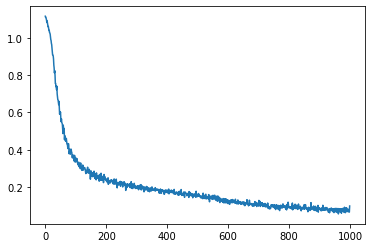

In [0]:
plt.plot(losses)

In [0]:
confusion_matrix(ytest,model(xtest).data.max(1, keepdim=True)[1])

array([[70,  3,  0],
       [13, 67,  0],
       [ 0,  0, 87]])

###Testing Using Custom Examples

In [0]:
model.eval()
example = deepcopy(xtest.data[25])
print(example)
example = Variable(example,volatile=True).float()
print(model(xtest).data[25])
print(ytest[25])

tensor([-0.1705,  0.2107,  0.2237,  0.2615,  0.0964,  1.5544, -0.2103,  0.9329,
         2.4789,  1.5616, -0.3362,  1.3287, -0.4238, -0.3357, -0.3656, -0.3732,
        -0.3428, -0.2289, -0.0566,  0.3978,  0.3923,  0.2103, -0.1156,  0.6518,
         0.4935, -0.4657, -0.1461, -0.2103,  1.3873,  1.0171,  1.9570,  1.0896,
        -0.6807, -0.8422,  0.8087,  0.9329,  1.3287,  0.6518,  0.2107,  0.2615,
         0.2237,  0.0964,  2.4833, -0.1788,  0.0404,  1.0501, -0.2016, -0.1495,
        -0.1493, -0.1568, -0.2981, -0.1542])
tensor([-17.7629, -28.2037,   0.0000])
tensor(2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  after removing the cwd from sys.path.


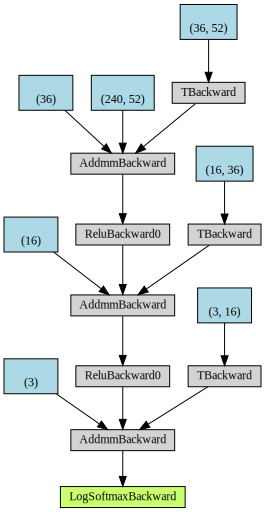

In [0]:
import torch
from torchviz import make_dot, make_dot_from_trace
xtest = Variable(xtest,requires_grad=True)
make_dot(model(xtest))

##Visualizing all layers

###Extracting Layers

In [0]:
import numpy as np
from copy import deepcopy
all_parameters=np.array(deepcopy(list(model.parameters())))

In [0]:
# Printing Paramter Names
for i in model.named_parameters():
  print(i[0])

fc1.weight
fc1.bias
fc2.weight
fc2.bias
fc3.weight
fc3.bias


In [0]:
for i in range(len(all_parameters)):
  all_parameters[i] = all_parameters[i].cpu().detach().numpy()

In [0]:
layer = 0
print(all_parameters[layer].shape,all_parameters[layer].size)
all_parameters[layer]

(36, 52) 1872


array([[-0.05214095,  0.07243418, -0.1470191 , ..., -0.02091103,
        -0.06806913,  0.00598609],
       [-0.02617749, -0.08408044,  0.06356481, ...,  0.1355812 ,
        -0.13922143,  0.05852673],
       [-0.09934659, -0.13486555,  0.06750552, ..., -0.00067954,
         0.0061405 ,  0.00927289],
       ...,
       [ 0.06798538, -0.09654494,  0.1312929 , ...,  0.00106038,
         0.01505741, -0.12015647],
       [ 0.15748905,  0.17856601, -0.00217214, ...,  0.01271011,
        -0.00559468, -0.06189599],
       [ 0.00724285,  0.04886409,  0.03532191, ...,  0.06596862,
         0.16131762,  0.05798631]], dtype=float32)

###Plotting the weights

Enter the Layer: 1
Enter the neuron number: 5


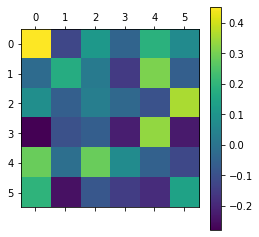

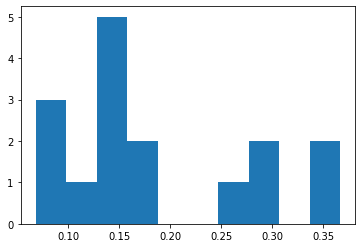

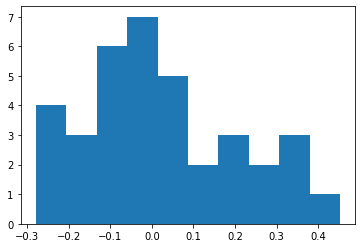

In [0]:
import matplotlib.pyplot as plt

layer =int(input('Enter the Layer: '))*2
Neuron_number = int(input('Enter the neuron number: '))

length = int(all_parameters[layer][Neuron_number].size**0.5)
plt.matshow(all_parameters[layer][Neuron_number].reshape(length,length))
plt.colorbar()
plt.show()

binwidth = 0.01

plt.hist(all_parameters[layer+1])
plt.show()

plt.hist(all_parameters[layer][Neuron_number])
plt.show()

###Visualizing Values as they pass through the model

In [0]:
# Evaluating an Example
model.train()
example = 0

print(model(xtest).data[example])

print(ytest[example])

tensor([-2.2844, -0.1194, -4.5388])
tensor(1)


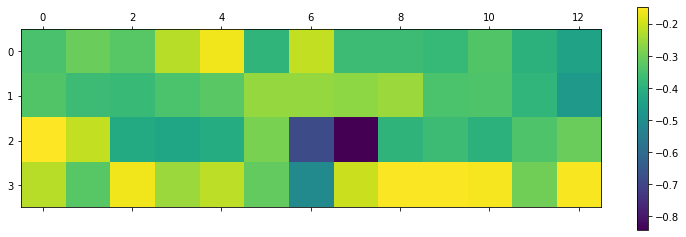

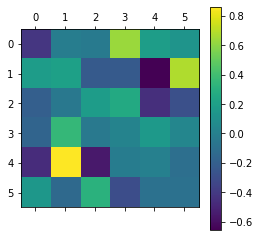

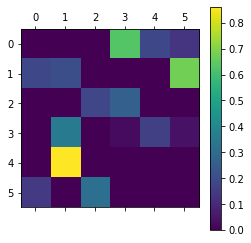

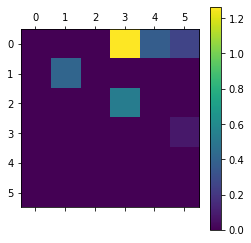

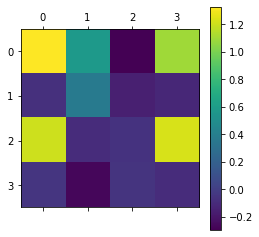

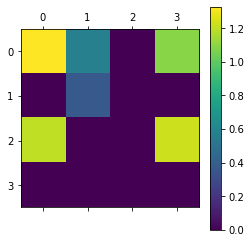

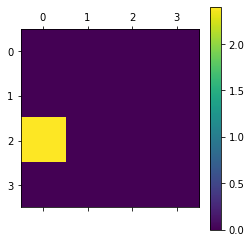

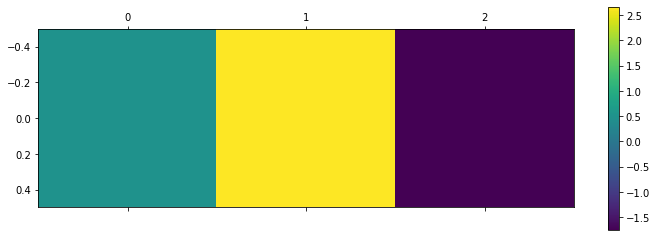

In [0]:
import numpy as np
img = plt.matshow(model.x[0].cpu().detach().numpy().reshape(4,13))
plt.colorbar()
plt.show()

plt.matshow(model.after_fc1[0].cpu().detach().numpy().reshape(6,6))
plt.colorbar()
plt.show()

plt.matshow(model.after_relu1[0].cpu().detach().numpy().reshape(6,6))
plt.colorbar()
plt.show()

plt.matshow(model.after_dropout1[0].cpu().detach().numpy().reshape(6,6))
plt.colorbar()
plt.show()

plt.matshow(model.after_fc2[0].cpu().detach().numpy().reshape(4,4))
plt.colorbar()
plt.show()

plt.matshow(model.after_relu2[0].cpu().detach().numpy().reshape(4,4))
plt.colorbar()
plt.show()

plt.matshow(model.after_dropout2[0].cpu().detach().numpy().reshape(4,4))
plt.colorbar()
plt.show()

plt.matshow(model.after_fc3[0].cpu().detach().numpy().reshape(1,3))
plt.colorbar()
plt.show()

##Attributing Result to neurons and Data Points

In [0]:
# Evaluating an Example
model.train()
e = 0
xtest.requires_grad = False
example = deepcopy(xtest[e].unsqueeze(0))
example.requires_grad=True
opt = model(example)


print(opt)

print(ytest[e])

model.after_fc3.shape
model.after_fc3[0][1].backward()

tensor([[ -3.6231,  -0.0271, -13.6302]], grad_fn=<LogSoftmaxBackward>)
tensor(1)


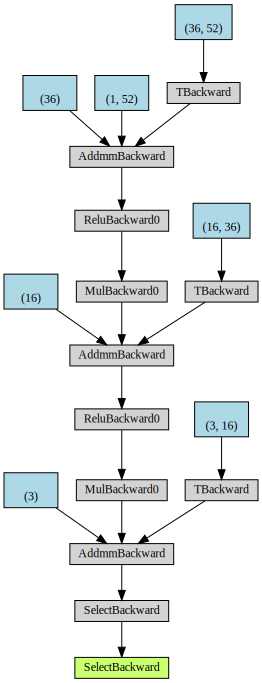

In [0]:
make_dot(model.after_fc3[0][1])

In [0]:
example.grad

tensor([[-0.8412, -1.0449, -0.3438,  0.7510,  1.8000, -1.4743,  3.2714, -1.1932,
         -3.6770,  0.6058, -1.6841,  0.3636, -1.1592,  0.3882,  3.8926,  1.8927,
          0.9709, -0.4166,  0.2075, -0.7591, -1.7330, -1.3920, -1.5454, -1.6818,
          0.9622, -0.1831, -0.2912,  3.5155, -0.4628, -1.0553, -1.6473,  0.0728,
         -1.8141,  0.8191, -1.7827, -1.4015,  0.2752, -1.0548, -3.0836,  0.6040,
          0.2606,  0.7349,  0.2432, -2.2497, -2.3226, -4.7271,  0.3844,  0.3593,
         -0.8556, -0.2981,  1.4941,  2.0616]])

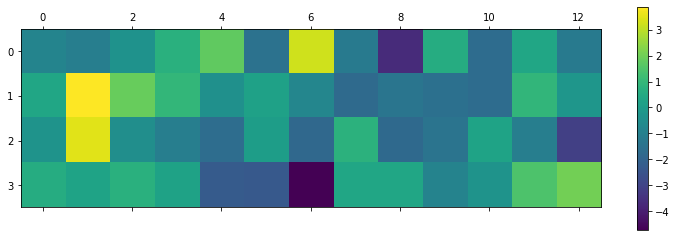

tensor([[ -2.5653,  -0.0800, -12.4638]])


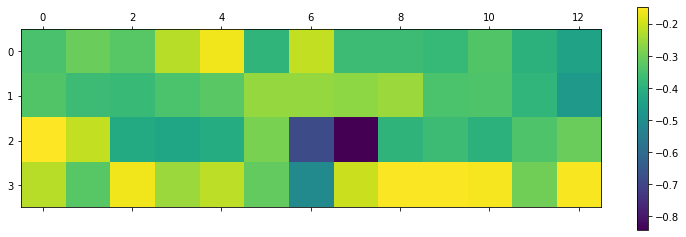

tensor([[-4.3106e+00, -1.3516e-02, -2.0495e+01]])


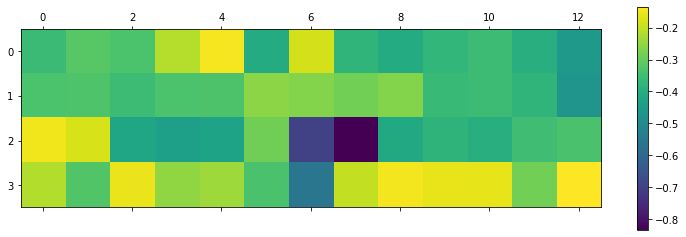

tensor([[-2.6195, -0.0785, -5.9396]])


In [0]:
gradients = example.grad.cpu().detach().numpy()

plt.matshow(gradients.reshape(4,13))
plt.colorbar()
plt.show()

example1 = Variable(example+example.grad*0,requires_grad=True)
print(model(example1).data)

example_np1 = example1.cpu().detach().numpy()

plt.matshow(example_np1.reshape(4,13))
plt.colorbar()
plt.show()

example2 = Variable(example+example.grad*0.01,requires_grad=True)
print(model(example2).data)

example_np2 = example2.cpu().detach().numpy()

plt.matshow(example_np2.reshape(4,13))
plt.colorbar()
plt.show()
print(model(example2).data)

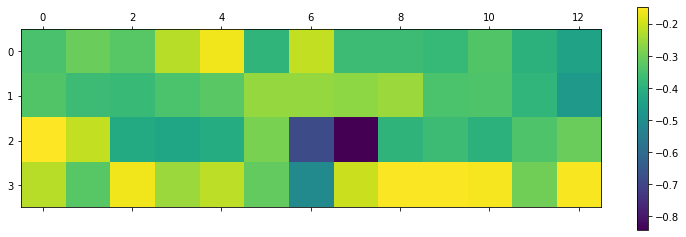

tensor([[ -3.1726,  -0.0428, -10.2112]])
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)

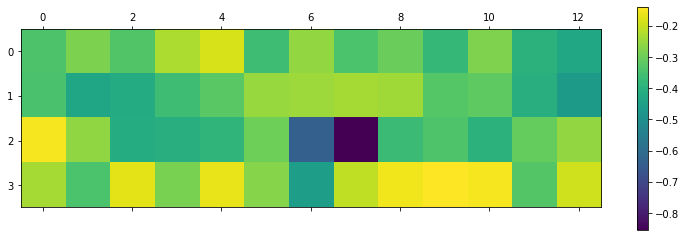

Difference: 


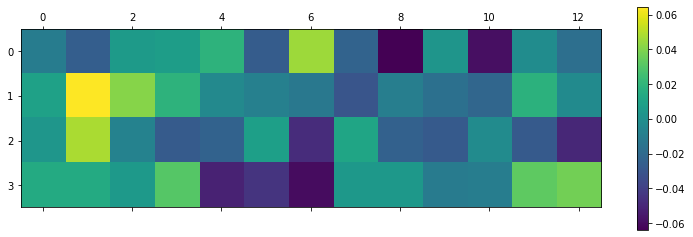

In [0]:
# performing a FGSM attack

# Evaluating an Example
e = 0
model.eval()
example = []
example = deepcopy(xtest[e].unsqueeze(0))

plt.matshow(example.reshape(4,13))
plt.colorbar()
plt.show()

real_example = Variable(example).float()
example = deepcopy(real_example)
example.requires_grad=True
print(model(example).data)

pi = torch.argmax(model(example).data)
print(pi)

while True:  
    example = Variable(example).float()
    example.requires_grad=True
    p = torch.argmax(model(example).data)
    print(p)
    if pi != p:
      break
    
    p = p.data.cpu().detach().numpy().tolist()
    #print(p)
    
    #plt.matshow(data.data[e])
    #plt.colorbar()

    model.after_fc3[0][1].backward()

    #gradients = example.grad.cpu().detach().numpy()

    #plt.matshow(gradients)
    #plt.colorbar()
    #plt.show()

    example = Variable(example-example.grad*0.0001,requires_grad=True)
    #print(model(example).data)

example_np1 = example.cpu().detach().numpy()


plt.matshow(example_np1.reshape(4,13))
plt.colorbar()
plt.show()

print('Difference: ')
plt.matshow(real_example.numpy().reshape(4,13)-example_np1.reshape(4,13))
plt.colorbar()
plt.show()

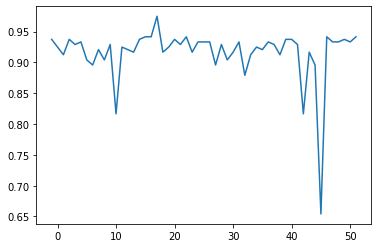

In [0]:
accuracies = []
xtestnp = xtest.numpy()
for i in range(-1,52):
  modified_test = deepcopy(xtestnp)
  if i!=-1:
    modified_test.T[i] = np.random.permutation(modified_test.T[i])
  modified_test = Variable(torch.Tensor(modified_test))
  pred = model(modified_test).data.max(1, keepdim=True)[1] # get the index of the max log-probability
  pred = [i[0].item() for i in pred]
  #print(pred)
  act = [i.item() for i in ytest]
  #print(act)
  accuracy = sum([i==j for (i,j) in zip(pred,act)])/len(xtest)
  accuracies.append(accuracy)

plt.plot([i for i in range(-1,len(accuracies)-1)],accuracies)


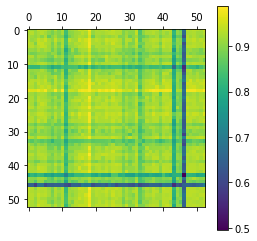

In [0]:
accuracies2d = []
xtestnp = xtest.numpy()
for i in range(-1,52):
  accuracies = []
  for j in range(-1,52):
    modified_test = deepcopy(xtestnp)
    if i!=-1:
      modified_test.T[i] = np.random.permutation(modified_test.T[i])
    if j!=-1:
      modified_test.T[j] = np.random.permutation(modified_test.T[j])
    modified_test = Variable(torch.Tensor(modified_test))
    pred = model(modified_test).data.max(1, keepdim=True)[1] # get the index of the max log-probability
    pred = [i[0].item() for i in pred]
    #print(pred)
    act = [i.item() for i in ytest]
    #print(act)
    accuracy = sum([i==j for (i,j) in zip(pred,act)])/len(xtest)
    accuracies.append(accuracy)
  accuracies2d.append(accuracies)

plt.matshow(accuracies2d)
plt.colorbar()
